In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Lagrange Interpolation

Lagrange interpolation is a polynomial interpolation that constructs new data points within the range of a discrete set of known data points. 

## Definition

Given a set of n data points

$$
(x_0, y_0), \dots, (x_j, y_j), \dots, (x_n, y_n)
$$

where no two $x_j$ are the same, the interpolation polynomial in the Lagrange form is a [linear combination](https://en.wikipedia.org/wiki/Linear_combination)

$$
L(x) = \sum_{j = 1}^n \ell_j \ (x) \text{ where }
\ell_j \ (x) = y_j \prod_{\begin{smallmatrix}k = 1 \\ k\ne j\end{smallmatrix}}^n \frac{x - x_k}{x_j - x_k}
$$

Where written explicitly gives

$$
L(x) = y_1 \frac{(x-x_2)(x-x_3) \cdots (x-x_n)}{(x_1 - x_2)(x_1 - x_3)\cdots(x_1-x_n)} + \cdots +y_n \frac{(x-x_1)(x-x_2) \cdots (x-x_{n-1})}{(x_n - x_1)(x_n - x_2)\cdots(x_n-x_{n-1})} 
$$

---

## Function Example

$$
f(x) = \sin(x)\left(\frac{1}{1-x^2}\right)
$$

In [15]:
def f(x):
    return np.divide(1, 1 + np.power(x, 2)) * np.sin(x)

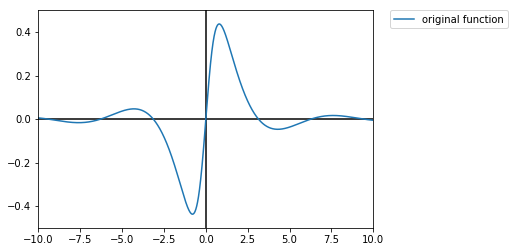

In [16]:
points = np.arange(-10, 10, .001)
plt.xlim(-10,10)
plt.ylim(-.5, .5)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(points, f(points), label="original function")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

---
## Implementation

### 1. Generate a set of $n$ points.

This will be done by generating $20$ values between $[-10, 10]$, and running each through $f(x)$ to obtain our $(x_0, y_0), \dots, (x_j, y_j), \dots, (x_n, y_n)$.

In [17]:
# Creating the set of points, and running them through our function. 
x_j = np.linspace(-10, 10, 20)
y_j = f(x_j)

print(len(x_j), x_j)
print(len(y_j), y_j)

20 [-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
20 [ 0.00538635 -0.00566871 -0.01577797 -0.01109019  0.013729    0.0426536
  0.035433   -0.06159955 -0.28627122 -0.39338127  0.39338127  0.28627122
  0.06159955 -0.035433   -0.0426536  -0.013729    0.01109019  0.01577797
  0.00566871 -0.00538635]


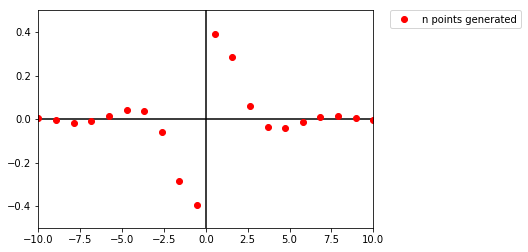

In [18]:
# Plotting the x,y points above.

plt.xlim(-10,10)
plt.ylim(-.5, .5)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(x_j, y_j, 'ro', label="n points generated")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 2. Use Langrange interpolation with the $n$ points.

Defining the $L(x)$ function with the designated $\ell_j \ (x)$ function inside.

$$
L(x) = \sum_{j = 1}^n \ell_j \ (x) \text{ where }
\ell_j \ (x) = y_j \prod_{\begin{smallmatrix}k = 1 \\ k\ne j\end{smallmatrix}}^n \frac{x - x_k}{x_j - x_k}
$$

In [19]:
def L(x, y, u):
    """ L(x) for Lagrange, given a specific x point & finding y from data.

    u - unknwon value to find.
    x - x data points of function output.
    y - y data points of function output.

    Return: Estimated y point.
    """
    result = 0
    for i in range(len(x) or len(y)):
        term = y[i]
        for k in range(len(x)):
            if k != i: 
                term = term * (u - x[k])/(x[i] - x[k])
        result += term

    return result

Running the Lagrange interpolation above for $200000$ points with the generated points $(x_0, y_0), \dots, (x_j, y_j), \dots, (x_n, y_n)$ as the input for the $n$ sized set.

In [20]:
x = np.arange(-10, 10, .0001) # Generates 200000 points.
y = L(x_j, y_j, x) # Runs these 200000 points through L(x) with our generated x_j, y_j.

print(len(x), len(y))

200000 200000


### 4. Plotting our interpolated points, and comparing. 

Plotting our interpolated points alone.

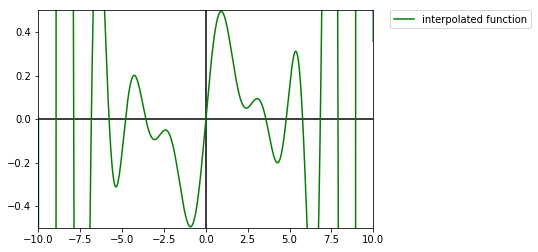

In [21]:
plt.xlim(-10,10)
plt.ylim(-.5, .5)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(x, y, color='g', label="interpolated function")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Plotting the original function, $n$ points, and interpolated function.

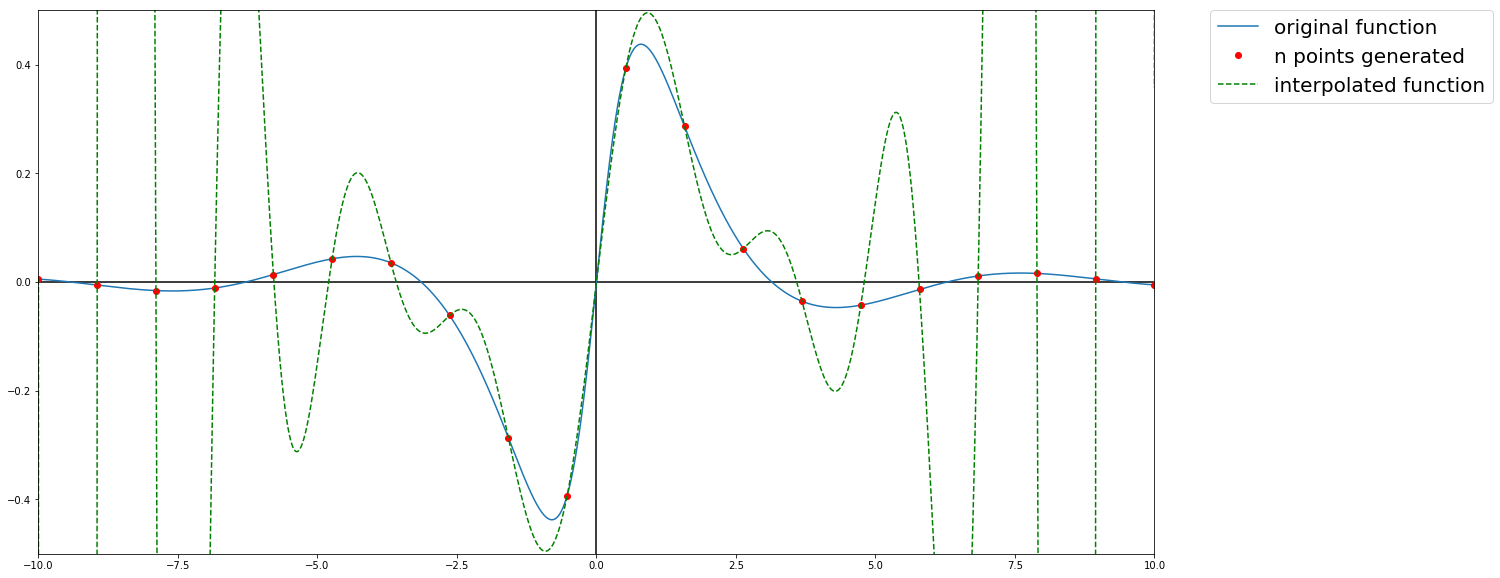

In [22]:
plt.figure(figsize=(20,10))
plt.xlim(-10,10)
plt.ylim(-.5, .5)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(points, f(points), '-', label="original function")
plt.plot(x_j, y_j, 'ro', label="n points generated")
plt.plot(x, y, "--", color='g', label="interpolated function")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 20})